https://www.kaggle.com/c/mercedes-benz-greener-manufacturing


## 설치
* [Xgboost :: Anaconda.org](https://anaconda.org/conda-forge/xgboost)

`conda install -c conda-forge xgboost`

* [Lightgbm :: Anaconda.org](https://anaconda.org/conda-forge/lightgbm)

`conda install -c conda-forge lightgbm`

* [conda install - Python package installation | CatBoost](https://catboost.ai/en/docs/installation/python-installation-method-conda-install)



## 다양한 머신러닝 모델에 대해서

* 버스, 승합차, 일반 중형차, 경차, 트럭 등 차에는 종류가 다양합니다.
* 차의 종류마다 쓰는 기름의 종류, 작동 원리, 주 사용처 등이 달라집니다.
* 마치 자동차처럼 머신러닝 모델도 원리에 따라 서로 다른 특징을 갖고 있습니다.

* 모델이 작동하는 기본 원리가 다르기 때문에, 데이터에 따라 최선의 모델은 항상 달라집니다.
* 따라서 상황에 따라서 적절한 머신러닝 모델을 적용할 수 있어야 합니다.
* 데이터에 여러 모델을 적용해보고 비교해보겠습니다.

## 목표

* 선형회귀 모델 외에 다양한 모델을 생성하고 사용해봅니다.
* 모델의 작동 원리와 특징에 대해서 간단히 살펴봅니다.

## 라이브러리 설명

### DecisionTreeRegressor
* 결정트리 모델을 구현한 라이브러리입니다.
*  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### RandomForestRegressor
* 앙상블 모델 중 배깅을 이용한 모델을 구현한 라이브러리입니다.
*  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### GradientBoostingRegressor
* 앙상블 모델 중 부스팅을 이용한 모델을 구현한 라이브러리입니다.
*  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### ExtraTreesRegressor
* 앙상블 모델 중 Extremely Randomized Tree 를 이용한 모델을 구현한 라이브러리입니다.
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

### xgboost
* Gradient Boosting Tree에서 병렬 학습을 지원하는 모델을 구현한 라이브러리입니다.
*  https://xgboost.readthedocs.io/en/stable/

### lightgbm
* XGBoost와 성능은 비슷하지만 시간과 메모리 측면에서 더 효율적인 모델을 구현한 라이브러리입니다.
* https://lightgbm.readthedocs.io

### catboost
* Gradient Boosting Tree에서 과적합 방지와 범주형 변수에 대해 강점을 가진 모델을 구현한 라이브러리입니다.
*  https://catboost.ai/

In [1]:
# catboost 라이브러리가 설치되어 있지 않다면, 설치해주세요.
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 87 kB/s 


## 라이브러리 로드

In [2]:
# numpy는 수학적 계산과 관련된 작업을 돕는 라이브러리입니다.
# pandas는 큰 데이터를 다룰 수 있도록 돕는 라이브러리입니다.
import numpy as np
import pandas as pd

# matplotlib.pyplot은 데이터와 관련된 그래프를 그릴 수 있도록 돕는 라이브러리입니다.
# seaborn은 데이터와 관련된 그래프를 그릴 수 있도록 돕는 라이브러리입니다.
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn.preprocessing은 데이터 전처리를 돕는 라이브러리입니다.
from sklearn import preprocessing

# os는 운영체제와 관련된 작업을 돕는 라이브러리입니다.
import os

## 준비 과정

In [3]:
base_path = "."

# train 변수에 train.csv 데이터를 불러옵니다.
# test 변수에 test.csv 데이터를 불러옵니다.
# sub 변수에 sample_submission.csv 데이터를 불러옵니다.
train = pd.read_csv(f'{base_path}/train_preprocessed.csv')
test = pd.read_csv(f'{base_path}/test_preprocessed.csv')
sub = pd.read_csv(f'{base_path}/sample_submission.csv.zip')

In [4]:
# train의 'y'행을 'target'으로 재명명(rename)합니다.
# train을 확인합니다.
train = train.rename(columns={'y':'target'})
train

,target,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,107.39,8,20,16,2,3,0,3,16,0,...,1,0,0,0,0,0,0,0,0,0
4204,108.77,31,16,40,3,3,0,7,7,0,...,0,1,0,0,0,0,0,0,0,0
4205,109.22,8,23,38,0,3,0,6,4,0,...,0,0,1,0,0,0,0,0,0,0
4206,87.48,9,19,25,5,3,0,11,20,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 변수 X에 'target' 값을 제외한 나머지 변수를 넣습니다.
# 변수 y에 'target' 값을 넣습니다.
X = train.drop(columns=['target'])
y = train['target']

In [6]:
# sklearn.model_selection의 train_test_split은 학습 데이터와 검증 데이터를 편리하게 나눠주는 함수입니다.
from sklearn.model_selection import train_test_split

# train_test_split을 이용해 X, y 값을 X_train, X_valid, y_train, y_valid 으로 나눠줍니다.
# 이 때, 학습할 데이터와 테스트할 데이터의 값의 비율은 9대 1로, random_state는 0으로 하겠습니다.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.9, random_state=0)

## 점수 산출 함수화

In [8]:
# 점수 산출하는 과정을 함수화합니다.
def scoreModel(model, X_train, X_valid, y_train, y_valid):
    '''
        머신러닝 모델과 X_train, X_valid, y_train, y_valid 변수를 받아서
        모델명, 학습용 세트 정확도(R2 score), 테스트 세트 정확도(R2 score)를 출력하는 함수
    '''
    print("모델 : {}".format(model))
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    valid_score = model.score(X_valid, y_valid)
    print("검증 세트 정확도: {:.3f}".format(valid_score))
    return valid_score

## random_state
* 모델이 무작위성을 가지고 있을 경우 실행할 때마다 결과가 달라집니다.
* random_state 파라미터는 난수를 고정시켜 매 실행마다 결과가 같아지게 합니다.

## 결정트리 모델
* 결정트리 모델은 데이터 특성에서 추론된 간단한 결정 규칙을 학습하여 대상 변수의 값을 예측하는 모델을 만드는 것입니다.
* 돼지, 닭, 소를 구분할 수 있는 간단한 결정트리 모델을 만든다고 상상해봅시다.
* 먼저 다리가 두 개인 경우와 그렇지 않은 경우를 구분합니다. 이 때 닭과 나머지로 구분됩니다.
* 그 뒤에 머리에 뿔이 있는 경우와 그렇지 않은 경우를 구분합니다. 이 때 소와 돼지를 구분할 수 있습니다.
* 이런 식으로 데이터에 규칙을 적용해가며 값을 예측하는 모델이 결정트리 모델입니다.

### 주요 파라미터
* criterion : {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    * 분할의 품질을 측정하는 기능입니다.
* splitter : {“best”, “random”}, default=”best”
    * 각 노드에서 분할을 선택하는 데 사용되는 전략입니다.
* max_depth : int, default=None
    * 트리의 최대 깊이입니다.
* min_samples_split : int or float, default=2
    * 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
* max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None
    * 최상의 분할을 찾을 때 고려해야 할 피처의 수입니다.
* random_state : int, RandomState instance or None, default=None
    * 추정기의 무작위성을 제어합니다. 
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [42]:
# sklearn.tree의 DecisionTreeRegressor는 결정 트리 모델을 구현한 라이브러리입니다.
from sklearn.tree import DecisionTreeRegressor

# 결정트리 모델을 생성합니다.
model_dt = DecisionTreeRegressor(max_depth=4, max_features=.9, random_state=42)

In [43]:
# DecisionTreeRegressor?

In [44]:
# 모델을 학습시킵니다.
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=0.9, random_state=42)

In [45]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_dt, X_train, X_valid, y_train, y_valid)

모델 : DecisionTreeRegressor(max_depth=4, max_features=0.9, random_state=42)
학습용 세트 정확도: 0.617
검증 세트 정확도: 0.519


In [46]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_dt = model_dt.predict(test)
prediction_dt

array([ 77.66272152,  93.9079061 ,  77.66272152, ...,  93.9079061 ,
       112.53620976,  93.9079061 ])

In [47]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_dt
sub

,ID,y
0,1,77.662722
1,2,93.907906
2,3,77.662722
3,4,77.662722
4,5,112.536210
...,...,...
4204,8410,103.230188
4205,8411,93.907906
4206,8413,93.907906
4207,8414,112.536210


In [48]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_dt_{score}.csv', index=False)

## 랜덤포레스트 모델
* 랜덤포레스트 모델 또한 트리를 이용한 앙상블 모델입니다.
* GBT와 달리, 배깅이라는 앙상블 기법을 이용합니다.

### 주요 파라미터
* n_estimators : int, default=100
    * 숲에 있는 나무의 수입니다.
* criterion : {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    * 분할의 품질을 측정하는 기능입니다. 
* max_depth : int, default=None
    * 트리의 최대 깊이입니다.
* min_samples_split : int or float, default=2
    * 내부 노드를 분할하는 데 필요한 최소 샘플 수
* max_features : {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    * 최상의 분할을 찾을 때 고려해야 할 기능의 수
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [52]:
# sklearn.ensemble의 RandomForestRegressor는 앙상블 모델 중 랜덤포레스트 모델을 구현한 라이브러리입니다.
from sklearn.ensemble import RandomForestRegressor

# 랜덤포레스트 모델을 생성합니다.
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=4, 
                                 max_features=0.9, random_state=42)

In [53]:
# 모델을 학습시킵니다.
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=0.9, n_estimators=1000,
                      random_state=42)

In [54]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_rf, X_train, X_valid, y_train, y_valid)

모델 : RandomForestRegressor(max_depth=4, max_features=0.9, n_estimators=1000,
                      random_state=42)
학습용 세트 정확도: 0.624
검증 세트 정확도: 0.525


In [55]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_rf = model_rf.predict(test)
prediction_rf

array([ 77.62921135,  98.35955393,  78.30642182, ...,  93.91913239,
       112.45080594,  93.92222246])

In [56]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_rf
sub

,ID,y
0,1,77.629211
1,2,98.359554
2,3,78.306422
3,4,77.595674
4,5,112.102729
...,...,...
4204,8410,103.603615
4205,8411,93.955112
4206,8413,93.919132
4207,8414,112.450806


In [57]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_rf_{score}.csv', encoding='utf-8', index=False)

## 그래디언트 부스팅 트리 모델
* 흔히 GBT라고 줄여 부르는 Gradient Boosting Tree 모델은 트리를 이용한 앙상블 모델입니다.
* 앙상블은 내부적으로 여러 모델을 생성한 후 모델들을 종합해 최종 모델을 생성하는 방법론입니다.
* GBT는 부스팅이라는 앙상블 기법을 사용합니다.

### 주요 파라미터
* loss : {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    * 최적화할 손실 함수입니다.
* learning_rate : float, default=0.1
    * 각 트리의 기여도를 learning_rate로 제한합니다.
* n_estimators : int, default=100
    * 숲에 있는 나무의 수입니다.
* criterion : {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
    * 분할의 품질을 측정하는 기능입니다. 
* max_depth : int, default=3
    * 트리의 최대 깊이입니다.
* max_features : {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    * 최상의 분할을 찾을 때 고려해야 할 기능의 수
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [71]:
# sklearn.ensemble의 GradientBoostingRegressor는 앙상블 방법론 중 부스팅을 이용한 트리 모델을 구현한 라이브러리입니다.
# 그래디언트 부스팅 트리 모델을 생성합니다.

from sklearn.ensemble import GradientBoostingRegressor

model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [72]:
# 모델을 학습시킵니다.
model_gbt.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [73]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_gbt, X_train, X_valid, y_train, y_valid)

모델 : GradientBoostingRegressor(random_state=42)
학습용 세트 정확도: 0.658
검증 세트 정확도: 0.523


* 테스트 세트 정확도가 0.519으로 지금까지 시도했던 모델 중 가장 높습니다.
* 테스트 세트 정확도가 높아진 이유가 무엇일까요? 생각해봅시다.

In [74]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_gbt = model_gbt.predict(test)
prediction_gbt

array([ 91.29248291, 113.17111767,  90.04850181, ...,  93.1142925 ,
       111.40851162,  93.79720456])

In [75]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_gbt
sub

,ID,y
0,1,91.292483
1,2,113.171118
2,3,90.048502
3,4,74.959193
4,5,110.813350
...,...,...
4204,8410,103.818216
4205,8411,96.376442
4206,8413,93.114293
4207,8414,111.408512


In [70]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_gbt_{score}.csv', index=False)

## 엑스트라 트리 모델
* 엑스트라 트리 모델은 극도로 무작위화(Extremely Randomized Tree)된 모델입니다.
* 랜덤 포레스트에서와 같이 후보 기능의 무작위 하위 집합이 사용되지만 가장 차별적인 임계값을 찾는 대신 각 후보 기능에 대해 임계값이 무작위로 그려지고 무작위로 생성된 임계값 중 가장 좋은 것이 분할 규칙으로 선택됩니다.
* 이것은 일반적으로 약간 더 큰 편향 증가를 희생시키면서 모델의 분산을 조금 더 줄일 수 있습니다.

### 주요 파라미터
* 이 클래스는 데이터 세트의 다양한 하위 샘플에 여러 무작위 결정 트리(추가 트리라고도 함)에 맞는 메타 추정기를 구현하고 평균을 사용하여 예측 정확도를 개선하고 과적합을 제어합니다.
* n_estimators : int, default=100
    * 숲에 있는 나무의 수입니다.
* criterion : {“squared_error”, “absolute_error”}, default=”squared_error”
    * 분할의 품질을 측정하는 기능입니다. 
* max_depth : int, default=None
    * 트리의 최대 깊이입니다.
* min_samples_split : int or float, default=2
    * 내부 노드를 분할하는 데 필요한 최소 샘플 수
* max_features : {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    * 최상의 분할을 찾을 때 고려해야 할 기능의 수
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

In [88]:
# sklearn.ensemble의 ExtraTreesRegressor는 앙상블 모델 중 엑스트라 트리 모델을 구현한 라이브러리입니다.
# 엑스트라 트리 모델을 생성합니다.

from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor(random_state=42, max_depth=4, max_features=0.9)
model_et

ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)

In [89]:
# 모델을 학습시킵니다.
model_et.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)

In [90]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_et, X_train, X_valid, y_train, y_valid)

모델 : ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)
학습용 세트 정확도: 0.618
검증 세트 정확도: 0.522


In [91]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_et = model_et.predict(test)
prediction_et

array([ 77.75133486,  95.02599166,  77.62235105, ...,  93.90924556,
       112.56203336,  93.92163333])

In [92]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_et
sub

,ID,y
0,1,77.751335
1,2,95.025992
2,3,77.622351
3,4,77.751335
4,5,112.519203
...,...,...
4204,8410,103.221901
4205,8411,93.921633
4206,8413,93.909246
4207,8414,112.562033


In [93]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_et_{score}.csv', index=False)

## 사이킷런 이외 모델들
* 지금부터 소개할 xgboost, lightgbm, catboost 모델은 GBT에서 단점을 보완하고 개선한 모델들입니다.
* 결정트리, 그래디언트 부스팅 트리, 랜덤 포레스트에 비하면 비교적 최신 모델들입니다.
* 최신 모델이라고 해서 앞에 소개한 모델들을 완전히 대체한다는 것은 아닙니다.
* 상황에 따라 적절한 모델을 선택하는 것이 중요합니다.
* 소개할 세 모델은 Kaggle이나 Dacon에서 높은 성적을 거두는 참가자들이 많이 사용해왔고 좋은 성과를 보여왔습니다.

## XGBoost 모델
* xgboost는 GBT에서 병렬 학습을 지원하여 학습 속도가 빨라진 모델입니다.
* 기본 GBT에 비해 더 효율적이고, 다양한 종류의 데이터에 대응할 수 있으며 이식성이 높습니다.


### XGBoost Parameter

* 부스팅 파라미터
    * Learning_rate[ 기본값 : 0.3] : Learning rate가 높을수록 과적합되기 쉬움
    * n_estimators [기본값 : 100] :  생성할 weaker learner 수, learning_rate가 낮을 땐, n_estimators를 높여야 과적합이 방지됨, value가 너무 낮으면 underfitting이 되고 이는 낮은 정확성의 prediction이 되는반면 value가 너무 높으면 overfitting이 되고 training data 에는 정확한 prediction을 보이지만 test data에서는 정확성이 낮은 prediction을 가짐
    * max_depth [ 기본값 : 6 ] :  트리의 maximum depth, 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용됨, max_depth가 높을수록 모델의 복잡도가 커져 과적합되기 쉬움
    * min_child_weight [ 기본값 : 1 ] : 관측치에 대한 가중치 합의 최소를 말함, 값이 높을수록 과적합이 방지됨
    * gamma [ 기본값 : 0 ] : 리프노드의 추가분할을 결정할 최소손실 감소값, 해당값보다 손실이 크게 감소할 때 분리, 값이 높을수록 과적합이 방지됨
    * subsample [ 기본값 : 1 ] : weak learner가 학습에 사용하는 데이터 샘플링 비율, 보통 0.5 ~ 1 사용됨, 값이 낮을수록 과적합이 방지됨
    * colsample_bytree [ 기본값 : 1 ] : 각 tree 별 사용된 feature의 퍼센테이지, 보통 0.5 ~ 1 사용됨, 값이 낮을수록 과적합이 방지됨
* 일반 파라미터
    * booster [기본값 = gbtree] : 어떤 부스터 구조를 쓸지 결정, 의사결정기반모형(gbtree), 선형모형(gblinear), dart
    * n_jobs : XGBoost를 실행하는 데 사용되는 병렬 스레드 수
    * verbosity [기본값 = 1] : 로그출력여부 0 (무음), 1 (경고), 2 (정보), 3 (디버그)
    * early_stopping_rounds :  손실함수 값이 n번정도 개선이 없으면 학습을 중단
* 학습과정 파라미터
    * eval_metric:
        * rmse: root mean square error
        * mae: mean absolute error
        * logloss: negative log-likelihood
        * error: Binary classification error rate (0.5 threshold)
        * merror: Multiclass classification error rate
        * mlogloss: Multiclass logloss
        * auc: Area under the curve
        * map (mean average precision)

In [114]:
# xgboost는 gradient boosting tree(GBT)의 병렬 학습을 구현한 라이브러리입니다.
# xgboost 모델을 생성합니다.

import xgboost as xgb
model_xgb = xgb.XGBRegressor(random_state=42, learning_rate=0.05, verbosity=0)
model_xgb

XGBRegressor(learning_rate=0.05, random_state=42, verbosity=0)

In [115]:
# 모델을 학습시킵니다.
model_xgb.fit(X_train, y_train)

XGBRegressor(learning_rate=0.05, random_state=42, verbosity=0)

In [117]:
# model_xgb.feature_importances_

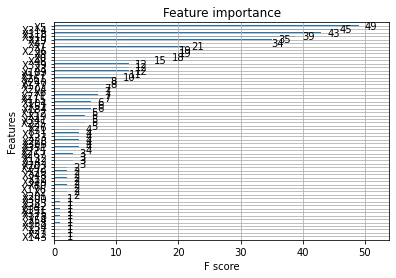

In [105]:
xgb.plot_importance(model_xgb)

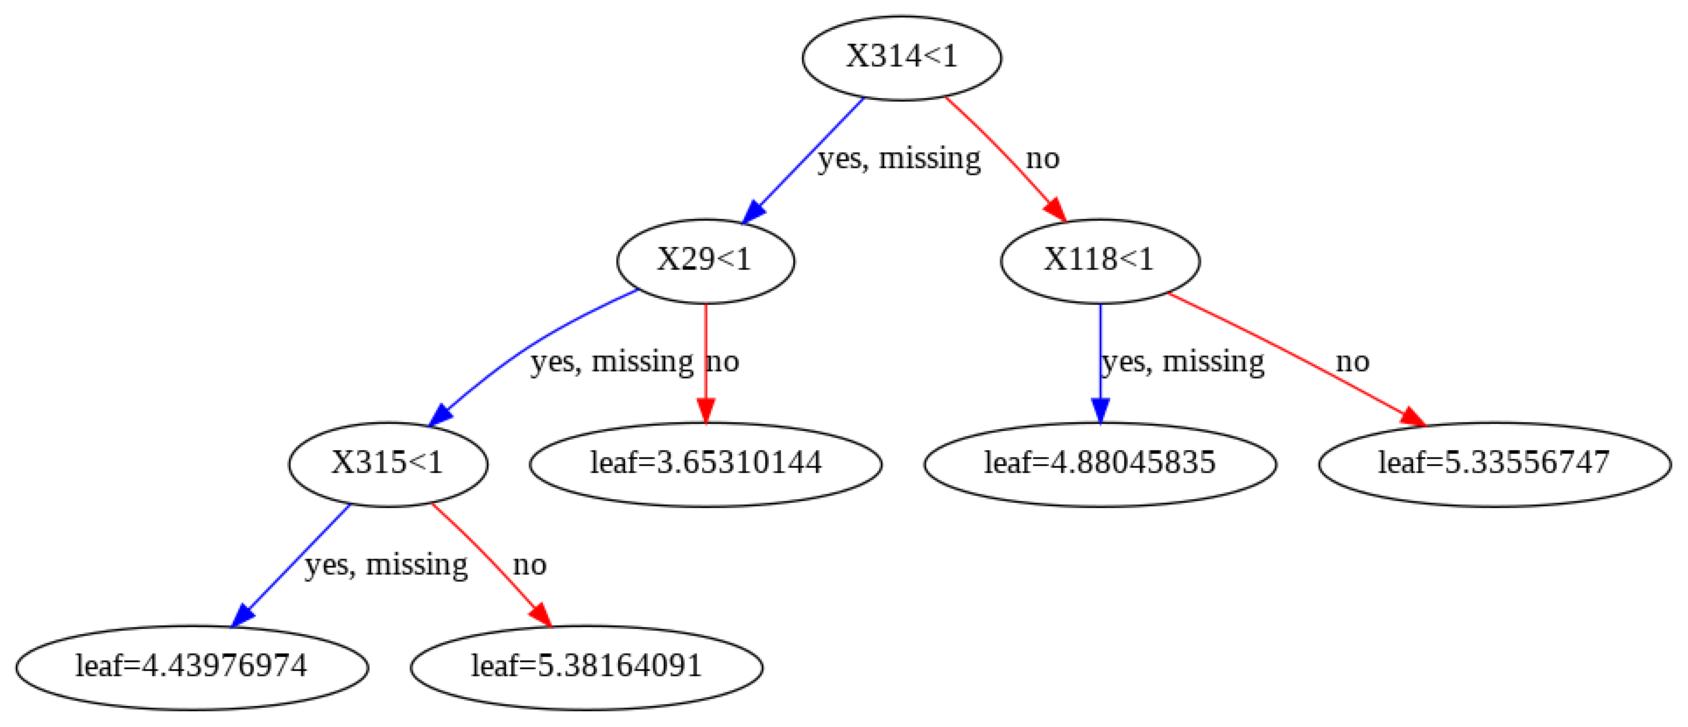

In [119]:
xgb.plot_tree(model_xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(30, 20)

In [120]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_xgb, X_train, X_valid, y_train, y_valid)

모델 : XGBRegressor(learning_rate=0.05, random_state=42, verbosity=0)
학습용 세트 정확도: 0.624
검증 세트 정확도: 0.525


In [121]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_xgb = model_xgb.predict(test)
prediction_xgb

array([ 81.75616 ,  98.13999 ,  82.37521 , ...,  93.31716 , 111.55746 ,
        93.405495], dtype=float32)

In [122]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_xgb
sub

,ID,y
0,1,81.756157
1,2,98.139992
2,3,82.375214
3,4,77.117210
4,5,110.080521
...,...,...
4204,8410,103.039459
4205,8411,93.515785
4206,8413,93.317162
4207,8414,111.557457


In [123]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_xgb_{score}.csv', index=False)

## lightgbm 모델
* XGBoost에 비해 성능은 비슷하지만 학습 시간을 단축시킨 모델이다.
* XGBoost에 비해 더 적은 시간, 더 적은 메모리를 사용한다.

### LightGBM Parameters

* max_depth : 나무의 깊이. 단일 결정나무에서는 충분히 데이터를 고려하기 위해 depth를 적당한 깊이로 만들지만, 보정되기 때문에 부스팅에서는 깊이 하나짜리도 만드는 등, 깊이가 짧은것이 크리티컬하지 않음
* min_data_in_leaf : 잎이 가질 수 있는 최소 레코드 수, 기본값은 20, 과적합을 다루기 위해 사용
feature_fraction : 부스팅 대상 모델이 랜덤포레스트일때, 랜덤포레스트는 feature의 일부만을 선택하여 훈련하는데, 이를 통제하기 위한 파라미터, 0.8이라면 LightGBM이 각 반복에서 80%의 파라미터를 무작위로 선택하여 트리를 생성
* bagging_fraction : 데이터의 일부만을 사용하는 bagging의 비율
예를들어 오버피팅을 방지하기 위해 데이터의 일부만을 가져와서 훈련시키는데, 이는 오버피팅을 방지하며 약한예측기를 모두 합칠경우는 오히려 예측성능이 좋아질 수 있음
훈련 속도를 높이고 과적합을 방지하는 데 사용
* early_stopping_round : 더이상 validation데이터에서 정확도가 좋아지지 않으면 멈춰버림 훈련데이터는 거의 에러율이 0에 가깝게 좋아지기 마련인데, validation데이터는 훈련에 사용되지 않기때문에 일정이상 좋아지지 않기 때문
* lambda : 정규화에 사용되는 파라미터, 일반적인 값의 범위는 0 ~ 1
* min_gain_to_split : 분기가 되는 최소 정보이득, 트리에서 유용한 분할 수를 제어하는 데 사용
* max_cat_group : 범주형 변수가 많으면, 하나로 퉁쳐서 처리하게끔 만드는 최소단위

* objective : lightgbm은 regression, binary, multiclass 모두 가능
* boosting: gbdt(gradient boosting decision tree), rf(random forest), dart(dropouts meet multiple additive regression trees), goss(Gradient-based One-Side Sampling)
* num_leaves: 결정나무에 있을 수 있는 최대 잎사귀 수. 기본값은 0.31
* learning_rate : 각 예측기마다의 학습률 learning_rate은 아래의 num_boost_round와도 맞춰주어야 함
* num_boost_round : boosting을 얼마나 돌릴지 지정한다. 보통 100정도면 너무 빠르게 끝나며, 시험용이 아니면 1000정도 설정하며,  early_stopping_round가 지정되어있으면 더이상 진전이 없을 경우 알아서 멈춤
* device : gpu, cpu
* metric: loss를 측정하기 위한 기준. mae (mean absolute error), mse (mean squared error), 등
* max_bin : 최대 bin
* categorical_feature : 범주형 변수 지정
* ignore_column : 컬럼을 무시한다. 무시하지 않을경우 모두 training에 넣는데, 뭔가 남겨놓아야할 컬럼이 있으면 설정
* save_binary: True 메모리 절약

https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [152]:
# ligthgbm은 xgboost에서 시간과 메모리 효율을 높인 라이브러리입니다.
# lightgbm 모델을 생성합니다.
import lightgbm as lgbm

model_lgbm = lgbm.LGBMRegressor(boosting_type="goss", learning_rate=0.01, 
                                max_depth=1, random_state=42, 
                                n_estimators=1400)
model_lgbm

LGBMRegressor(boosting_type='goss', learning_rate=0.01, max_depth=1,
              n_estimators=1400, random_state=42)

In [153]:
# 모델을 학습시킵니다.
model_lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='goss', learning_rate=0.01, max_depth=1,
              n_estimators=1400, random_state=42)

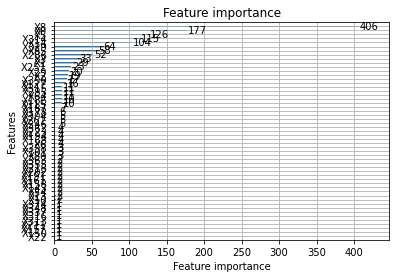

In [154]:
lgbm.plot_importance(model_lgbm)

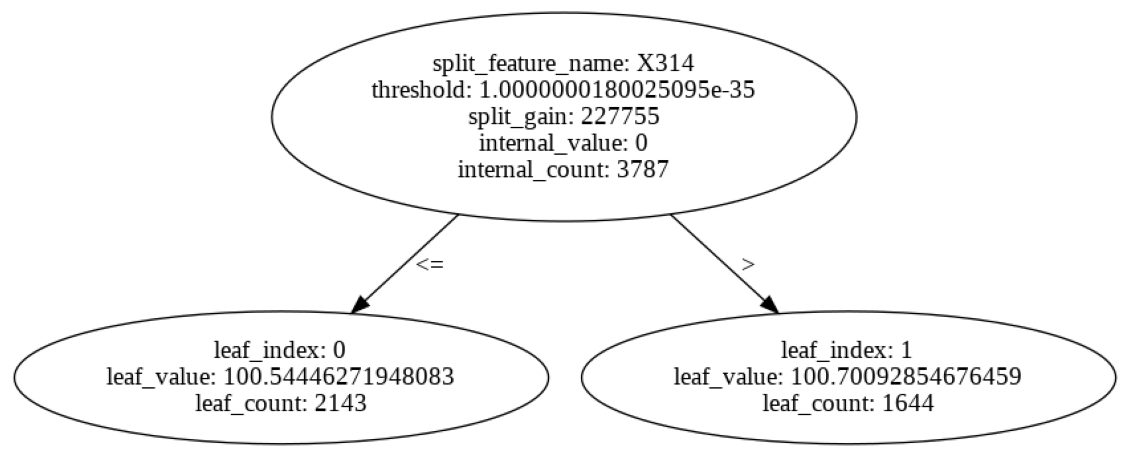

In [155]:
lgbm.plot_tree(model_lgbm, figsize=(20, 20), tree_index=0, 
               show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])

In [156]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_lgbm,X_train, X_valid, y_train, y_valid)

모델 : LGBMRegressor(boosting_type='goss', learning_rate=0.01, max_depth=1,
              n_estimators=1400, random_state=42)
학습용 세트 정확도: -28.898
검증 세트 정확도: -28.949


In [157]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_lgbm = model_lgbm.predict(test)
prediction_lgbm

array([ 88.21585966, 145.6622657 , -31.88006667, ...,  70.17384092,
       215.46761438, 240.95281937])

In [150]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_lgbm
sub

,ID,y
0,1,79.279507
1,2,95.613356
2,3,80.018193
3,4,79.279507
4,5,109.759799
...,...,...
4204,8410,106.597150
4205,8411,95.613356
4206,8413,92.492363
4207,8414,110.439844


In [ ]:
# plot_importance


In [158]:
# plot_tree
# show_info=['split_gain', 'internal_count', 'leaf_count']


In [159]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_lgbm_{score}.csv', index=False)

## CatBoost 모델
* catboost는 기존 GBT의 느린 학습 속도와 과대적합 문제를 개선한 모델입니다.
* 과대적합이란 모델이 지나친 학습으로 인해 경향이 학습용 세트에 쏠려 있는 현상을 말합니다.
* 학습용 세트에서는 예측을 잘 하지만(특수한 상황), 일반적인 상황에서 예측 능력이 떨어지는 것입니다.

### 주요 파라미터
* cat_features 
    * 범주형 변수 인덱스 값
* loss_function
    * 손실 함수를 지정합니다.
* eval_metric
    * 평가 메트릭을 지정합니다.
* iterations
    * 머신러닝 중 만들어질 수 있는 트리의 최대 갯수를 지정합니다.
* learning_rate
    * 부스팅 과정 중 학습률을 지정합니다.
* subsample
    * 배깅을 위한 서브샘플 비율을 지정합니다.
* max_leaves
    * 최종 트리의 최대 리프 개수를 지정합니다.
* https://catboost.ai/en/docs/references/training-parameters/common

In [185]:
# catboost는 gradient boosting tree(GBT)에서 카테고리형 변수와 과대적합 방지를 구현한 라이브러리입니다.
# catboost 모델을 생성합니다.
# model_cat
import catboost

model_cat = catboost.CatBoostRegressor(eval_metric='R2', verbose=False)
model_cat

In [179]:
# SymmetricTree - 대칭트리
# Lossguide - 리프별 
# Depthwise - 깊이별
from scipy.stats import randint
from sklearn.utils.fixes import loguniform

param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(1, 5),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [ ]:
# randomized_search
result = model_cat.randomized_search(param_grid, X_train, y_train, cv=3, n_iter=10)
result

In [191]:
df_result = pd.DataFrame(result)
df_result = df_result.loc[["train-R2-mean", "test-R2-mean"], "cv_results"]
df_result

train-R2-mean    [-59.21220527004606, -53.85562366333166, -48.9...
test-R2-mean     [-59.262108543674834, -53.91728084033961, -49....
Name: cv_results, dtype: object

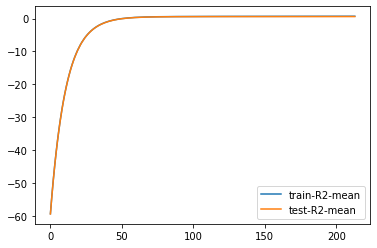

In [195]:
pd.DataFrame({"train-R2-mean": df_result.loc["train-R2-mean"], 
              "test-R2-mean" :  df_result.loc["test-R2-mean"] }).plot()

In [181]:
# 모델을 학습시킵니다.
model_cat.fit(X_train, y_train)

In [182]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_cat, X_train, X_valid, y_train, y_valid)

모델 : <catboost.core.CatBoostRegressor object at 0x7efc012cfd50>
학습용 세트 정확도: 0.777
검증 세트 정확도: 0.491


In [183]:
# 모델의 예측값을 변수에 담습니다.
# 예측값을 확인합니다.
prediction_cat = model_cat.predict(test)
prediction_cat

array([ 91.21718364, 103.85164279,  90.18183113, ...,  91.61640805,
       109.62007321,  93.81333062])

In [184]:
# sub의 'y' 변수에 예측값을 넣습니다.
# sub를 확인합니다.
sub['y'] = prediction_cat
sub

,ID,y
0,1,91.217184
1,2,103.851643
2,3,90.181831
3,4,74.486344
4,5,111.057291
...,...,...
4204,8410,107.189781
4205,8411,94.957424
4206,8413,91.616408
4207,8414,109.620073


In [175]:
# sub를 csv 파일로 내보냅니다.
sub.to_csv(f'{base_path}/sub_cat_{score}.csv', index=False)

## 제출
* 지금까지 각 모델로 예측한 값을 Kaggle에 제출합니다.
* 테스트 세트 정확도와 public score, private score를 비교합니다.
* 리더보드에서 다른 참가자의 점수도 확인해봅니다.

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

* 점수에는 public score와 private score가 있습니다.
* 대회마다 public score와 private score를 매기는 방식이 다 다르지만, 일반적으로 public score는 전체 데이터 중 일부만을 샘플링하여 채점하고, private score는 전체 데이터 중 더 많은 데이터를 대상으로 채점합니다.
* 참가자들이 얻은 public score는 리더보드에 공개되며 이를 바탕으로 현재 위치를 가늠할 수 있습니다.
* 그러나 최종 결과는 private score로 결정됩니다.

## 범주형 데이터 다루기

In [219]:
# 전처리 하지 않은 원본 데이터를 불러와서 실습합니다.
train = pd.read_csv("train.csv.zip", index_col="ID").reset_index(drop=True)
train.head(2)

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


In [220]:
test = pd.read_csv("test.csv.zip", index_col="ID").reset_index(drop=True)
test.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0


### category type 변경

In [221]:
cat_col = train.select_dtypes(include="object").columns
cat_col

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [222]:
for col in cat_col:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")

In [223]:
train.dtypes

y        float64
X0      category
X1      category
X2      category
X3      category
          ...   
X380       int64
X382       int64
X383       int64
X384       int64
X385       int64
Length: 377, dtype: object

In [224]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns="y"), train["y"], 
                                                      train_size = 0.9, random_state=0)

### lightGBM

In [225]:
model_lgbm = lgbm.LGBMRegressor(random_state=42)
model_lgbm

LGBMRegressor(random_state=42)

In [226]:
model_lgbm.fit(X_train, y_train)
score = scoreModel(model_lgbm,X_train, X_valid, y_train, y_valid)

모델 : LGBMRegressor(random_state=42)
학습용 세트 정확도: 0.835
검증 세트 정확도: 0.298


### catBoost

In [227]:
model_cat = catboost.CatBoostRegressor(eval_metric='R2', verbose=False, 
                                       cat_features=cat_col.tolist())
model_cat

In [228]:
model_cat.fit(X_train, y_train)

In [229]:
score = scoreModel(model_cat,X_train, X_valid, y_train, y_valid)

모델 : <catboost.core.CatBoostRegressor object at 0x7efc01381210>
학습용 세트 정확도: 0.682
검증 세트 정확도: 0.330
